In [ ]:
#SHIP IDENTIFICATION USING CNN

In [1]:
import json, sys, random
import numpy as np

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

In [4]:
from PIL import Image, ImageDraw 

In [5]:
from matplotlib import pyplot as plt

In [6]:
# download dataset from json object
f = open(r'shipsnet.json')
dataset = json.load(f)
f.close()

In [7]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

In [8]:
input_data.shape


(4000, 19200)

In [9]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [10]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape


(3, 80, 80)

In [11]:
X

array([[[[ 82,  89,  91, ...,  89,  84,  83],
         [ 89,  91,  89, ..., 101,  87,  87],
         [ 91,  93,  86, ...,  83,  90,  92],
         ...,
         [ 89,  88,  92, ...,  88,  85,  89],
         [ 87,  88,  91, ...,  91,  90,  90],
         [ 88,  91,  90, ...,  88,  89,  90]],

        [[ 94,  99, 101, ..., 102,  96,  96],
         [100, 102, 101, ..., 115, 100,  99],
         [101, 104,  98, ...,  96, 102, 102],
         ...,
         [ 98,  98, 102, ...,  99,  97, 100],
         [ 99,  99, 101, ..., 101, 101, 102],
         [ 99, 101, 101, ..., 101, 102, 102]],

        [[ 80,  86,  89, ...,  86,  81,  84],
         [ 86,  88,  89, ...,  97,  84,  86],
         [ 88,  92,  85, ...,  81,  88,  89],
         ...,
         [ 87,  86,  89, ...,  86,  84,  87],
         [ 87,  86,  88, ...,  88,  88,  89],
         [ 85,  87,  87, ...,  86,  88,  89]]],


       [[[ 76,  75,  67, ...,  78,  77,  80],
         [ 71,  73,  72, ...,  79,  77,  81],
         [ 73,  70,  67, ..., 

In [13]:
# get one chanel
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

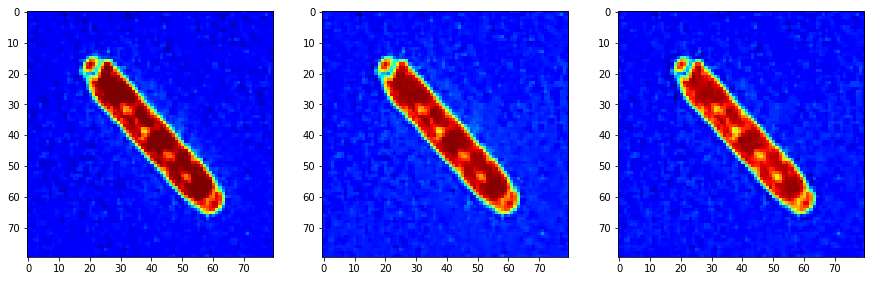

In [14]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()


In [15]:
output_data.shape

(4000,)

In [16]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [17]:
np.bincount(output_data)

array([3000, 1000])

In [18]:
y = np_utils.to_categorical(output_data, 2)


In [19]:
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [20]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]


In [21]:
X_train = X_train / 255

In [22]:
np.random.seed(42)

In [23]:
from keras import callbacks
import h5py
from keras import callbacks
from keras.callbacks import CSVLogger
import keras
import keras.preprocessing.text
import itertools
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import callbacks
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

In [24]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        9248      
__________

In [26]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

checkpointer = callbacks.ModelCheckpoint(filepath="logs/lstm/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='acc')
csv_logger = CSVLogger('logs/lstm/training_set_lstmanalysis.csv',separator=',', append=False)
# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)
model.save("logs/lstm/coomplemodel.hdf5")
#score, acc = model.evaluate(X_test, y_test, batch_size=64)
#print('Test score:', score)
#print('Test accuracy:', acc

Train on 2240 samples, validate on 560 samples
Epoch 1/18
 - 30s - loss: 0.5970 - acc: 0.6875 - val_loss: 0.5315 - val_acc: 0.7357
Epoch 2/18
 - 28s - loss: 0.5295 - acc: 0.7487 - val_loss: 0.4862 - val_acc: 0.8000
Epoch 3/18
 - 28s - loss: 0.4781 - acc: 0.7902 - val_loss: 0.4626 - val_acc: 0.8089
Epoch 4/18
 - 28s - loss: 0.4616 - acc: 0.8067 - val_loss: 0.4705 - val_acc: 0.7875
Epoch 5/18
 - 28s - loss: 0.4265 - acc: 0.8241 - val_loss: 0.4093 - val_acc: 0.8268
Epoch 6/18
 - 28s - loss: 0.4289 - acc: 0.8237 - val_loss: 0.4047 - val_acc: 0.8375
Epoch 7/18
 - 28s - loss: 0.4105 - acc: 0.8326 - val_loss: 0.4035 - val_acc: 0.8375
Epoch 8/18
 - 29s - loss: 0.4019 - acc: 0.8339 - val_loss: 0.4011 - val_acc: 0.8321
Epoch 9/18
 - 28s - loss: 0.4019 - acc: 0.8317 - val_loss: 0.3994 - val_acc: 0.8393
Epoch 10/18
 - 30s - loss: 0.3849 - acc: 0.8353 - val_loss: 0.4060 - val_acc: 0.8304
Epoch 11/18
 - 29s - loss: 0.3847 - acc: 0.8438 - val_loss: 0.4037 - val_acc: 0.8411
Epoch 12/18
 - 29s - loss: 

In [27]:
image = Image.open('sfbay_3.png')
pix = image.load()

In [28]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [29]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [30]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

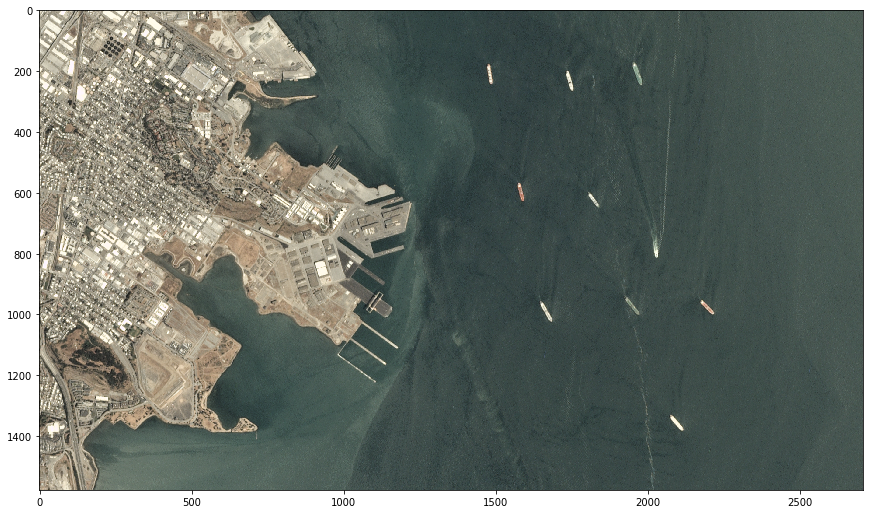

In [31]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [32]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [33]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study


In [34]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [35]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:130 Y:10  [[0.02004764 0.9799524 ]]


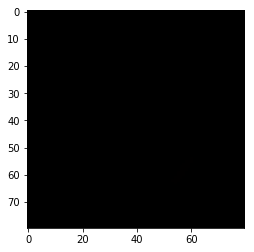

X:450 Y:30  [[0.09520672 0.90479326]]


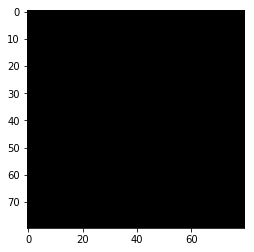

X:710 Y:30  [[0.07169801 0.92830193]]


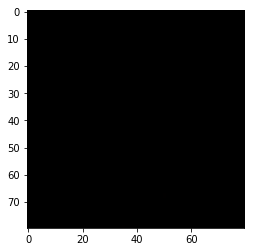

X:240 Y:40  [[0.08253518 0.9174648 ]]


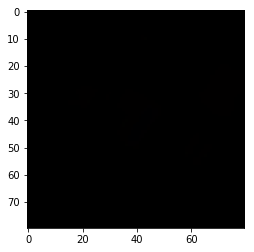

X:800 Y:90  [[0.05611914 0.94388086]]


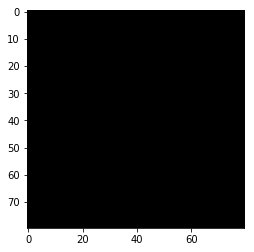

X:590 Y:120  [[0.07638006 0.9236199 ]]


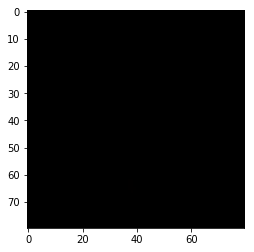

X:1900 Y:120  [[0.0293352  0.97066486]]


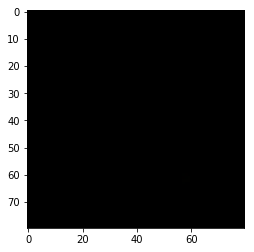

X:1420 Y:130  [[0.02959777 0.97040224]]


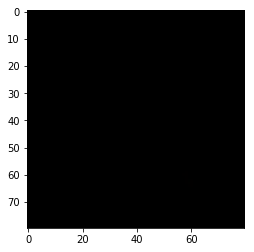

X:680 Y:140  [[0.08352815 0.91647184]]


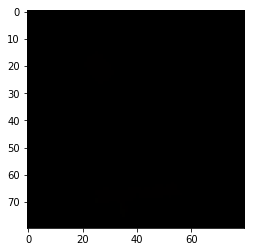

X:490 Y:160  [[0.06270032 0.93729967]]


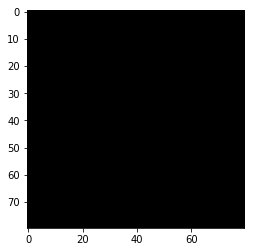

X:1700 Y:180  [[0.00674216 0.9932579 ]]


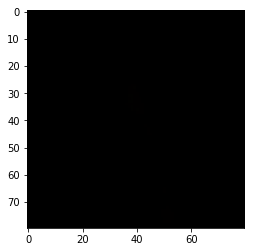

X:840 Y:200  [[0.06667794 0.9333221 ]]


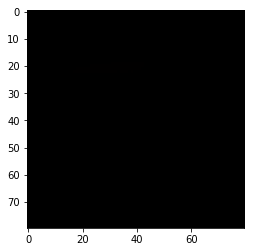

X:1450 Y:220  [[0.06275114 0.9372489 ]]


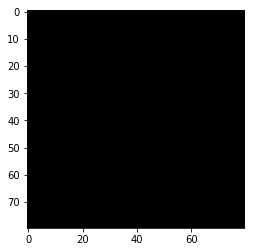

X:230 Y:280  [[0.04168619 0.9583139 ]]


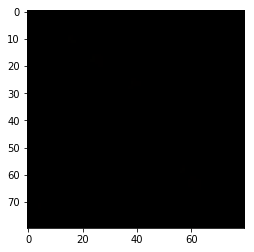

X:610 Y:280  [[0.06725802 0.93274206]]


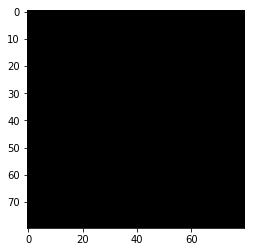

X:730 Y:440  [[0.01822501 0.9817749 ]]


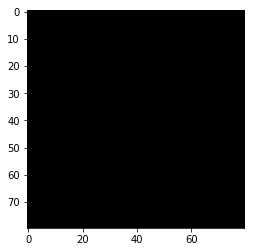

X:620 Y:460  [[0.05593242 0.9440676 ]]


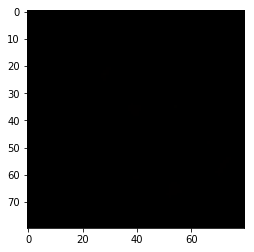

X:320 Y:480  [[0.05688979 0.9431102 ]]


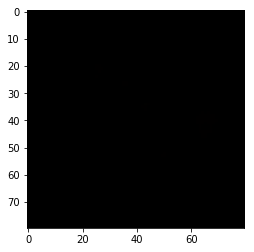

X:460 Y:480  [[0.03005737 0.9699426 ]]


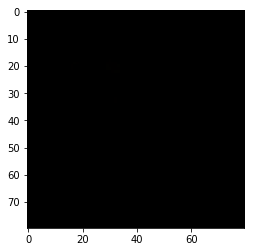

X:1530 Y:510  [[0.0068446 0.9931554]]


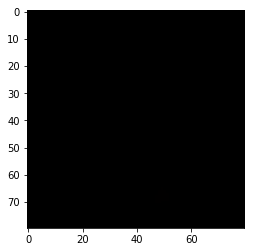

X:860 Y:540  [[0.0436626 0.9563374]]


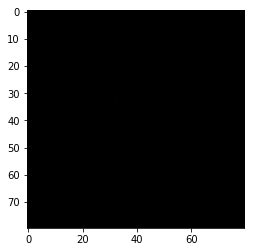

X:950 Y:550  [[0.01682741 0.98317254]]


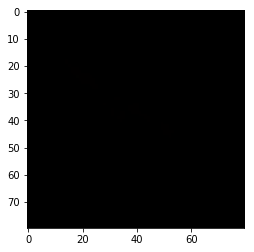

X:640 Y:560  [[0.08465345 0.9153465 ]]


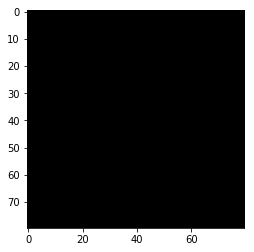

X:750 Y:580  [[0.03387886 0.9661212 ]]


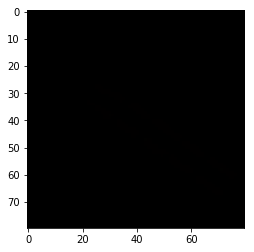

X:160 Y:590  [[0.02802444 0.97197556]]


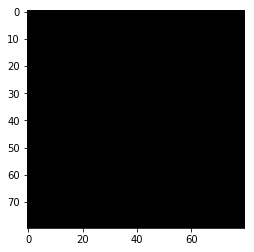

X:30 Y:650  [[0.03763117 0.9623688 ]]


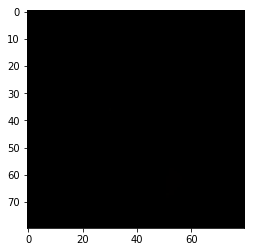

X:510 Y:650  [[0.06073479 0.93926525]]


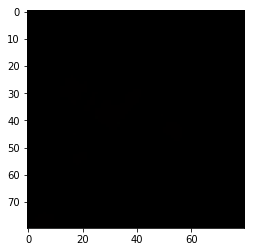

X:1020 Y:660  [[0.09075329 0.9092467 ]]


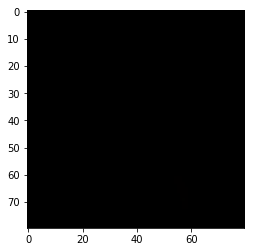

X:650 Y:690  [[0.06622528 0.9337747 ]]


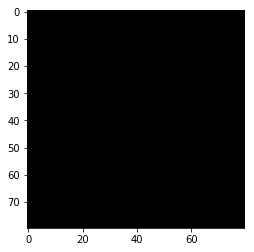

X:1990 Y:750  [[0.07458448 0.92541546]]


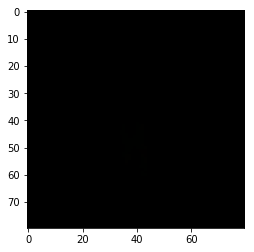

X:490 Y:780  [[0.04257173 0.9574282 ]]


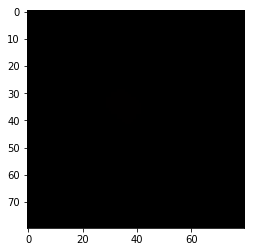

X:980 Y:800  [[0.04291873 0.9570813 ]]


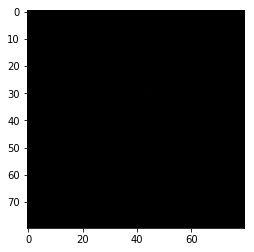

X:620 Y:810  [[0.03854028 0.9614597 ]]


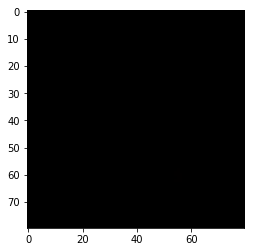

X:280 Y:870  [[0.05444705 0.94555295]]


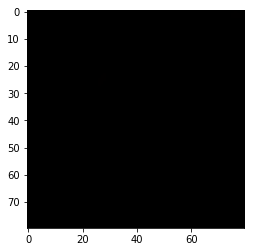

X:2130 Y:890  [[0.08045796 0.9195421 ]]


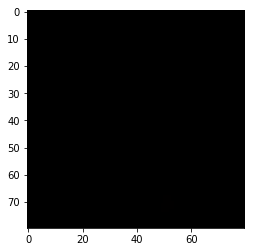

X:980 Y:900  [[0.0356002 0.9643998]]


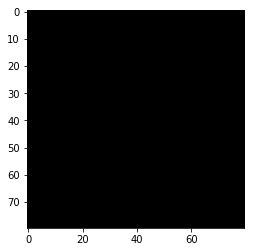

X:1600 Y:900  [[0.04220266 0.9577974 ]]


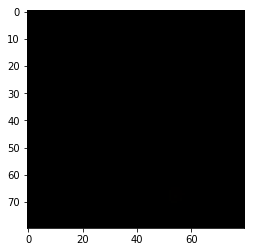

X:60 Y:990  [[0.09503204 0.90496796]]


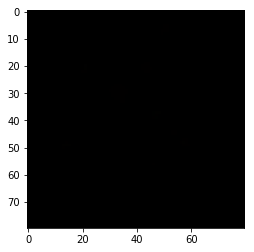

X:440 Y:1030  [[0.09449867 0.90550137]]


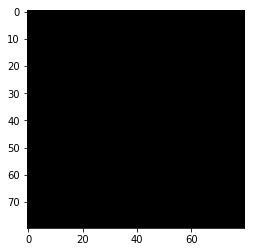

X:270 Y:1060  [[0.08812238 0.9118776 ]]


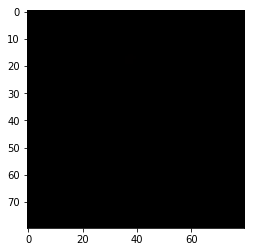

X:1080 Y:1100  [[0.05828593 0.94171405]]


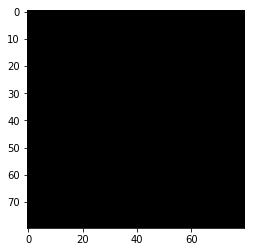

X:2050 Y:1310  [[0.01457851 0.9854214 ]]


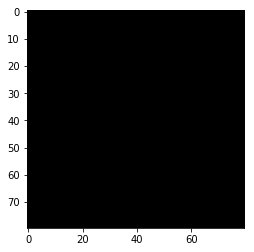

X:2620 Y:1490  

In [36]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [37]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [38]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1577, 2709, 3)

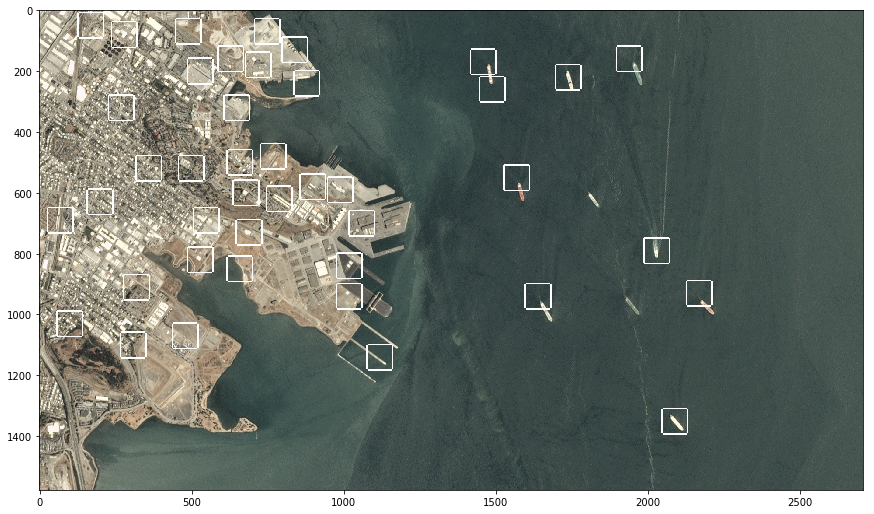

In [39]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()